# 따릉이 2019년 11월 대여 데이터 분석

### 분석 목표: 어느 시간대에 어느 곳에 따릉이를 배치해야 할까?
    - 가설
        - [시간]
            - 1. 따릉이는 출퇴근 용으로 많이 빌릴 것 같다(반납장소, 대여 시간(아침/밤))
            - 2. 따릉이는 주말에 많이 이용한다.(대여요일)
        
        - [장소]
            - 4. 한강 근처/공원(많이 나오는 대여소 번호 주변에 뭐가 있는지)
            - 5. 번화가에서 많이 빌린다.(주택가보다)
            - 6. 역/시장/학교/아파트 group by 해서 자전거 id 많이 있는 거 뽑음

In [2]:
df_bicycle = pd.read_csv("C:/Users/shine/Desktop/code/9. project/01_project_data/bicycle.csv", encoding="cp949")
df_bicycle.head(10)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-04392,2019-11-28 23:07:06,2377,수서역 5번출구 뒤,9,2019-11-28 23:18:44,1203,밀리아나2빌딩 앞,5,11,1980.0
1,SPB-23502,2019-11-28 22:43:23,2613,잠실나들목,3,2019-11-29 00:07:07,1203,밀리아나2빌딩 앞,1,82,11130.0
2,SPB-11498,2019-11-29 00:04:35,1256,문정현대아파트 교차로,6,2019-11-29 00:11:24,1203,밀리아나2빌딩 앞,14,6,800.0
3,SPB-16665,2019-11-29 00:02:57,1278,송파구청 교차로,9,2019-11-29 00:21:18,1203,밀리아나2빌딩 앞,2,18,3730.0
4,SPB-14688,2019-11-29 00:17:16,1230,송파중학교 정문,5,2019-11-29 00:26:36,1203,밀리아나2빌딩 앞,3,9,1370.0
5,SPB-21479,2019-11-29 00:06:48,1050,둔촌역 3번 출입구,15,2019-11-29 00:38:26,1203,밀리아나2빌딩 앞,20,30,4490.0
6,SPB-18660,2019-11-29 00:43:48,1207,마천CU우방점 앞,2,2019-11-29 01:09:26,1203,밀리아나2빌딩 앞,8,23,3370.0
7,SPB-17128,2019-11-29 00:58:58,1271,송파도서관,1,2019-11-29 01:09:53,1203,밀리아나2빌딩 앞,9,10,2110.0
8,SPB-24249,2019-11-29 01:27:57,1286,위례중앙푸르지오 1단지 앞,3,2019-11-29 02:20:08,1203,밀리아나2빌딩 앞,1,46,4830.0
9,SPB-06096,2019-11-29 02:07:59,1259,방이역 1번출구,12,2019-11-29 02:21:53,1203,밀리아나2빌딩 앞,10,13,2340.0


In [324]:
###"%"
pd.to_datetime(df_bicycle['대여일시']).dt.strftime("%H")

0         23
1         22
2         00
3         00
4         00
          ..
678825    08
678826    08
678827    08
678828    08
678829    11
Name: 대여일시, Length: 678830, dtype: object

In [325]:
df_columns = df_bicycle[["자전거번호", "대여일시", "대여 대여소명", "반납대여소명", "반납일시", "이용시간", "이용거리"]]
df_columns

,자전거번호,대여일시,대여 대여소명,반납대여소명,반납일시,이용시간,이용거리
0,SPB-04392,2019-11-28 23:07:06,수서역 5번출구 뒤,밀리아나2빌딩 앞,2019-11-28 23:18:44,11,1980.0
1,SPB-23502,2019-11-28 22:43:23,잠실나들목,밀리아나2빌딩 앞,2019-11-29 00:07:07,82,11130.0
2,SPB-11498,2019-11-29 00:04:35,문정현대아파트 교차로,밀리아나2빌딩 앞,2019-11-29 00:11:24,6,800.0
3,SPB-16665,2019-11-29 00:02:57,송파구청 교차로,밀리아나2빌딩 앞,2019-11-29 00:21:18,18,3730.0
4,SPB-14688,2019-11-29 00:17:16,송파중학교 정문,밀리아나2빌딩 앞,2019-11-29 00:26:36,9,1370.0
...,...,...,...,...,...,...,...
678825,SPB-07983,2019-11-26 08:27:07,동방1교,영남단말기정비,2019-11-26 09:31:27,59,8520.0
678826,SPB-24906,2019-11-27 08:26:19,미림여고입구 교차로,영남단말기정비,2019-11-27 09:26:19,59,8680.0
678827,SPB-17861,2019-11-28 08:11:43,동방1교,영남단말기정비,2019-11-28 08:54:39,40,10570.0
678828,SPB-17173,2019-11-29 08:12:31,동방1교,영남단말기정비,2019-11-29 09:17:29,64,10560.0


In [326]:
### 대여일시 타입 변경
df_columns["대여일시"] = pd.to_datetime(df_columns["대여일시"])
df_columns.dtypes

C:\Users\shine\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


자전거번호              object
대여일시       datetime64[ns]
대여 대여소명            object
반납대여소명             object
반납일시               object
이용시간                int64
이용거리              float64
dtype: object

In [327]:
df_columns["year"] = df_columns["대여일시"].dt.year
df_columns["month"] = df_columns["대여일시"].dt.month
df_columns["day"] = df_columns["대여일시"].dt.day
df_columns["hour"] = df_columns["대여일시"].dt.hour
df_columns["minute"] = df_columns["대여일시"].dt.minute
df_columns["second"] = df_columns["대여일시"].dt.second

df_columns.tail()

C:\Users\shine\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\shine\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\shine\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,자전거번호,대여일시,대여 대여소명,반납대여소명,반납일시,이용시간,이용거리,year,month,day,hour,minute,second
678825,SPB-07983,2019-11-26 08:27:07,동방1교,영남단말기정비,2019-11-26 09:31:27,59,8520.0,2019,11,26,8,27,7
678826,SPB-24906,2019-11-27 08:26:19,미림여고입구 교차로,영남단말기정비,2019-11-27 09:26:19,59,8680.0,2019,11,27,8,26,19
678827,SPB-17861,2019-11-28 08:11:43,동방1교,영남단말기정비,2019-11-28 08:54:39,40,10570.0,2019,11,28,8,11,43
678828,SPB-17173,2019-11-29 08:12:31,동방1교,영남단말기정비,2019-11-29 09:17:29,64,10560.0,2019,11,29,8,12,31
678829,SPB-17714,2019-11-29 11:47:16,영남단말기정비,영남단말기정비,2019-11-29 13:04:17,76,2420.0,2019,11,29,11,47,16


In [328]:
df_columns.drop(['year', 'second'], axis='columns', inplace=True)

In [329]:
df_columns.tail()

,자전거번호,대여일시,대여 대여소명,반납대여소명,반납일시,이용시간,이용거리,month,day,hour,minute
678825,SPB-07983,2019-11-26 08:27:07,동방1교,영남단말기정비,2019-11-26 09:31:27,59,8520.0,11,26,8,27
678826,SPB-24906,2019-11-27 08:26:19,미림여고입구 교차로,영남단말기정비,2019-11-27 09:26:19,59,8680.0,11,27,8,26
678827,SPB-17861,2019-11-28 08:11:43,동방1교,영남단말기정비,2019-11-28 08:54:39,40,10570.0,11,28,8,11
678828,SPB-17173,2019-11-29 08:12:31,동방1교,영남단말기정비,2019-11-29 09:17:29,64,10560.0,11,29,8,12
678829,SPB-17714,2019-11-29 11:47:16,영남단말기정비,영남단말기정비,2019-11-29 13:04:17,76,2420.0,11,29,11,47


In [330]:
clean_columns = df_columns[["자전거번호", "month", "day", "hour", "minute"]] 

In [331]:
data = clean_columns.set_index("자전거번호")
data

,month,day,hour,minute
자전거번호,,,,
SPB-04392,11,28,23,7
SPB-23502,11,28,22,43
SPB-11498,11,29,0,4
SPB-16665,11,29,0,2
SPB-14688,11,29,0,17
...,...,...,...,...
SPB-07983,11,26,8,27
SPB-24906,11,27,8,26
SPB-17861,11,28,8,11


### 시간대별 대여 횟수

In [332]:
h0 = sum(data["hour"] == 0)
h1 = sum(data["hour"] == 1)
h2 = sum(data["hour"] == 2)
h3 = sum(data["hour"] == 3)
h4 = sum(data["hour"] == 4)
h5 = sum(data["hour"] == 5)
h6 = sum(data["hour"] == 6)
h7 = sum(data["hour"] == 7)
h8 = sum(data["hour"] == 8)
h9 = sum(data["hour"] == 9)
h10 = sum(data["hour"] == 10)
h11 = sum(data["hour"] == 11)
h12 = sum(data["hour"] == 12)
h13 = sum(data["hour"] == 13)
h14 = sum(data["hour"] == 14)
h15 = sum(data["hour"] == 15)
h16 = sum(data["hour"] == 16)
h17 = sum(data["hour"] == 17)
h18 = sum(data["hour"] == 18)
h19 = sum(data["hour"] == 19)
h20 = sum(data["hour"] == 20)
h21 = sum(data["hour"] == 21)
h22 = sum(data["hour"] == 22)
h23 = sum(data["hour"] == 23)

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [334]:
datas = {
    "hour": ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11",
          "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23"],
    "rent": [h0, h1, h2, h3, h4, h5, h6, h7, h8, h9, h10, h11,
          h12, h13, h14, h15, h16, h17, h18, h19, h20, h21, h22, h23]
}
#하나의 key 값은 컬럼

In [335]:
df = pd.DataFrame(datas)
df

,hour,rent
0,0,23591
1,1,21254
2,2,15301
3,3,10006
4,4,6341
5,5,5353
6,6,9496
7,7,23314
8,8,44411
9,9,27827


In [336]:
df.dtypes

hour    object
rent     int64
dtype: object

In [337]:
from datetime import datetime

In [338]:
df.hour = df.hour.apply(lambda x: datetime.strptime(x, '%H'))

In [339]:
df["hh"] = pd.to_datetime(df["hour"]).dt.strftime("%H")

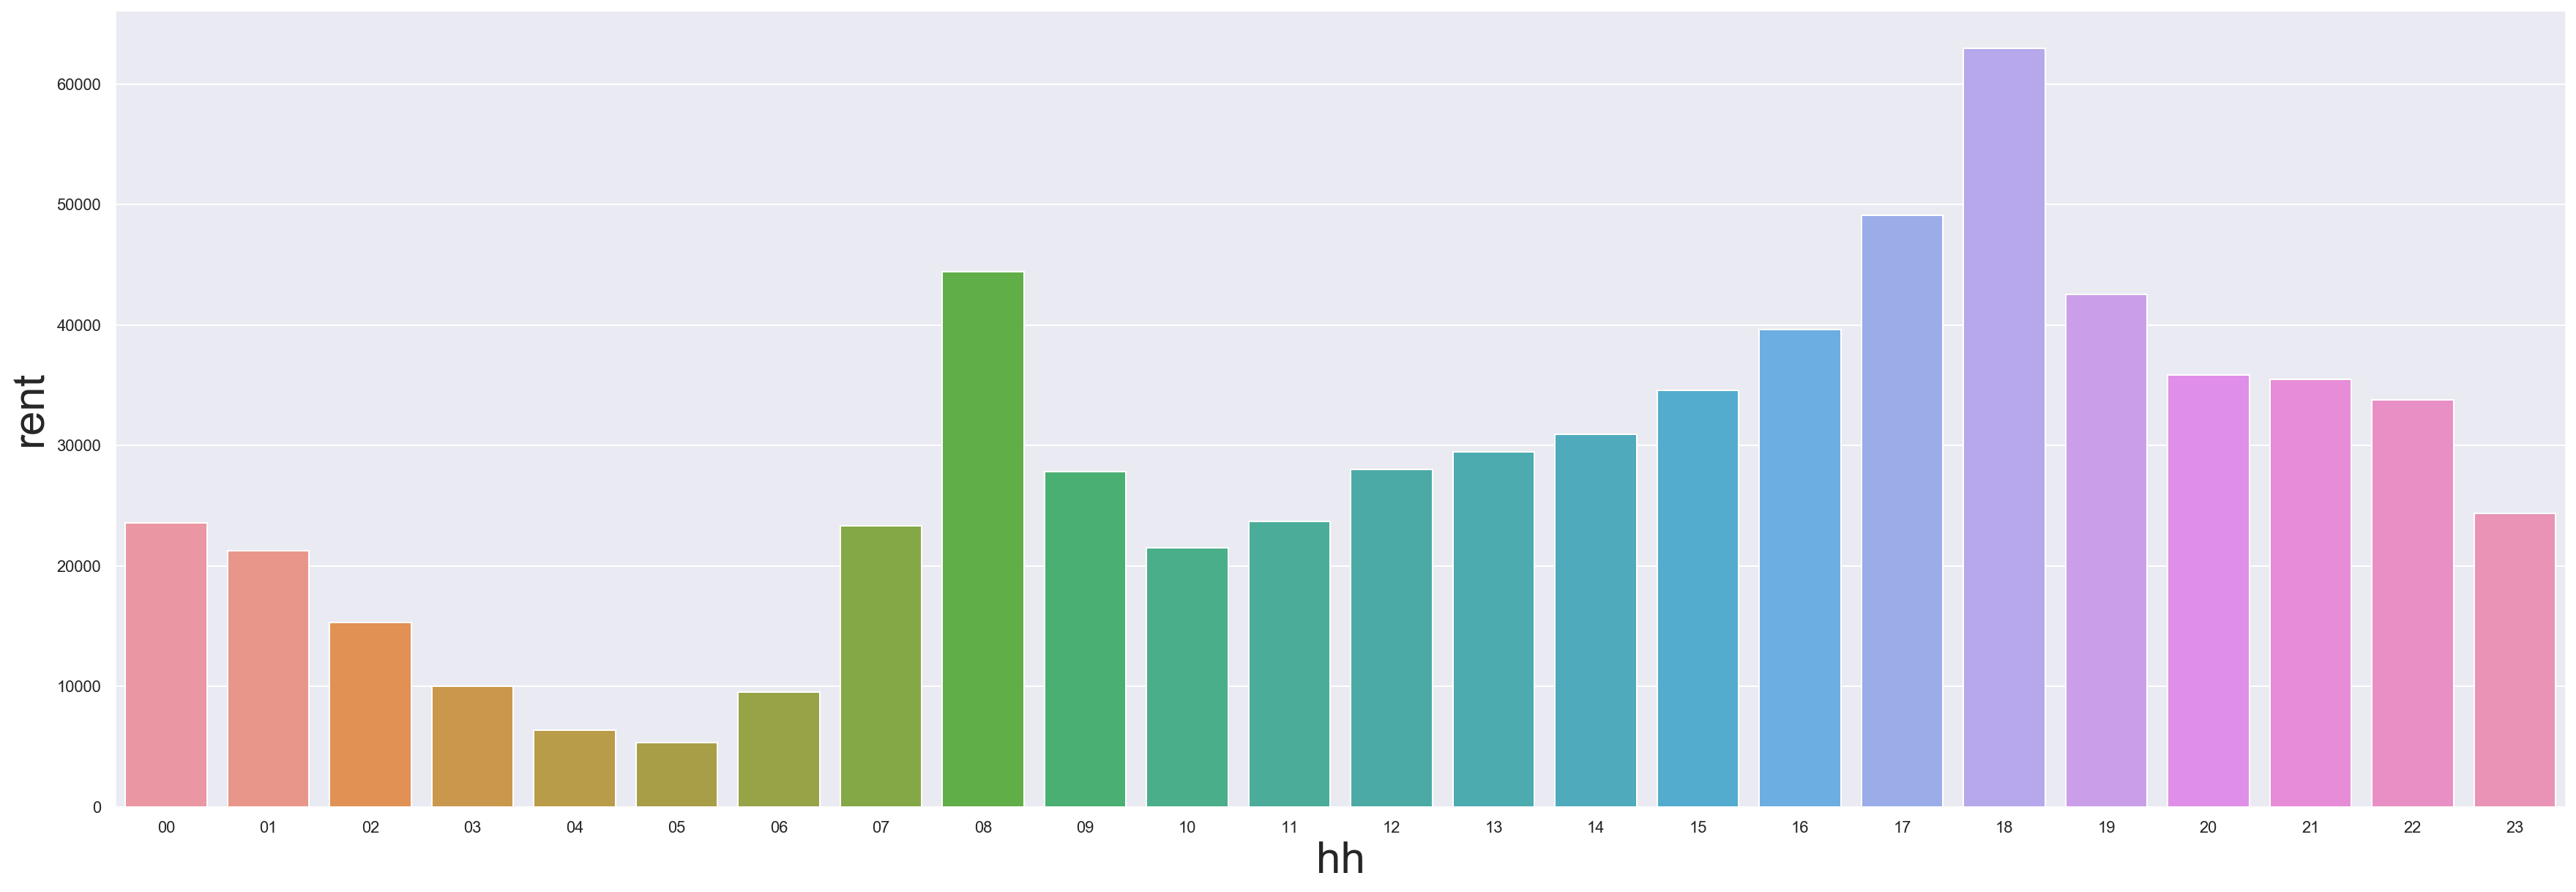

In [356]:
sns.barplot(data = df, x="hh", y="rent", label="rent")
sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale=1)
sns.set(rc={'axes.labelsize': 1})

In [341]:
pd.melt(df, id_vars=['hour'], value_vars=['rent'])

,hour,variable,value
0,1900-01-01 00:00:00,rent,23591
1,1900-01-01 01:00:00,rent,21254
2,1900-01-01 02:00:00,rent,15301
3,1900-01-01 03:00:00,rent,10006
4,1900-01-01 04:00:00,rent,6341
5,1900-01-01 05:00:00,rent,5353
6,1900-01-01 06:00:00,rent,9496
7,1900-01-01 07:00:00,rent,23314
8,1900-01-01 08:00:00,rent,44411
9,1900-01-01 09:00:00,rent,27827


### 요일 별 대여 횟수

In [342]:
Sun = sum(data["day"] == 3) + sum(data["day"] ==  10) + sum(data["day"] == 17) + sum(data["day"] == 24)
Mon = sum(data["day"] == 4) + sum(data["day"] ==  11) + sum(data["day"] == 18) + sum(data["day"] == 25)
Tue = sum(data["day"] == 5) + sum(data["day"] ==  12) + sum(data["day"] == 19) + sum(data["day"] == 26)
Wed = sum(data["day"] == 6) + sum(data["day"] ==  13) + sum(data["day"] == 20) + sum(data["day"] == 27)
Thur = sum(data["day"] == 7) + sum(data["day"] ==  14) + sum(data["day"] == 21) + sum(data["day"] == 28)
Fri = sum(data["day"] == 8) + sum(data["day"] ==  15) + sum(data["day"] == 22) + sum(data["day"] == 29)
Sat = sum(data["day"] == 9) + sum(data["day"] ==  16) + sum(data["day"] == 23) + sum(data["day"] == 30)


In [343]:
datas2 = {
    "week": ["Sun", "Mon", "Tue", "Wed", "Thur", "Fri", "Sat"],
    "rent": [Sun, Mon, Tue, Wed, Thur, Fri, Sat]
}
#하나의 key 값은 컬럼


In [344]:
df2 = pd.DataFrame(datas2)
df2

,week,rent
0,Sun,65686
1,Mon,95045
2,Tue,104938
3,Wed,88768
4,Thur,91159
5,Fri,79702
6,Sat,88726


In [345]:
table2 = pd.pivot_table(df2, values = ('rent'), index='week')
table2

,rent
week,
Fri,79702
Mon,95045
Sat,88726
Sun,65686
Thur,91159
Tue,104938
Wed,88768


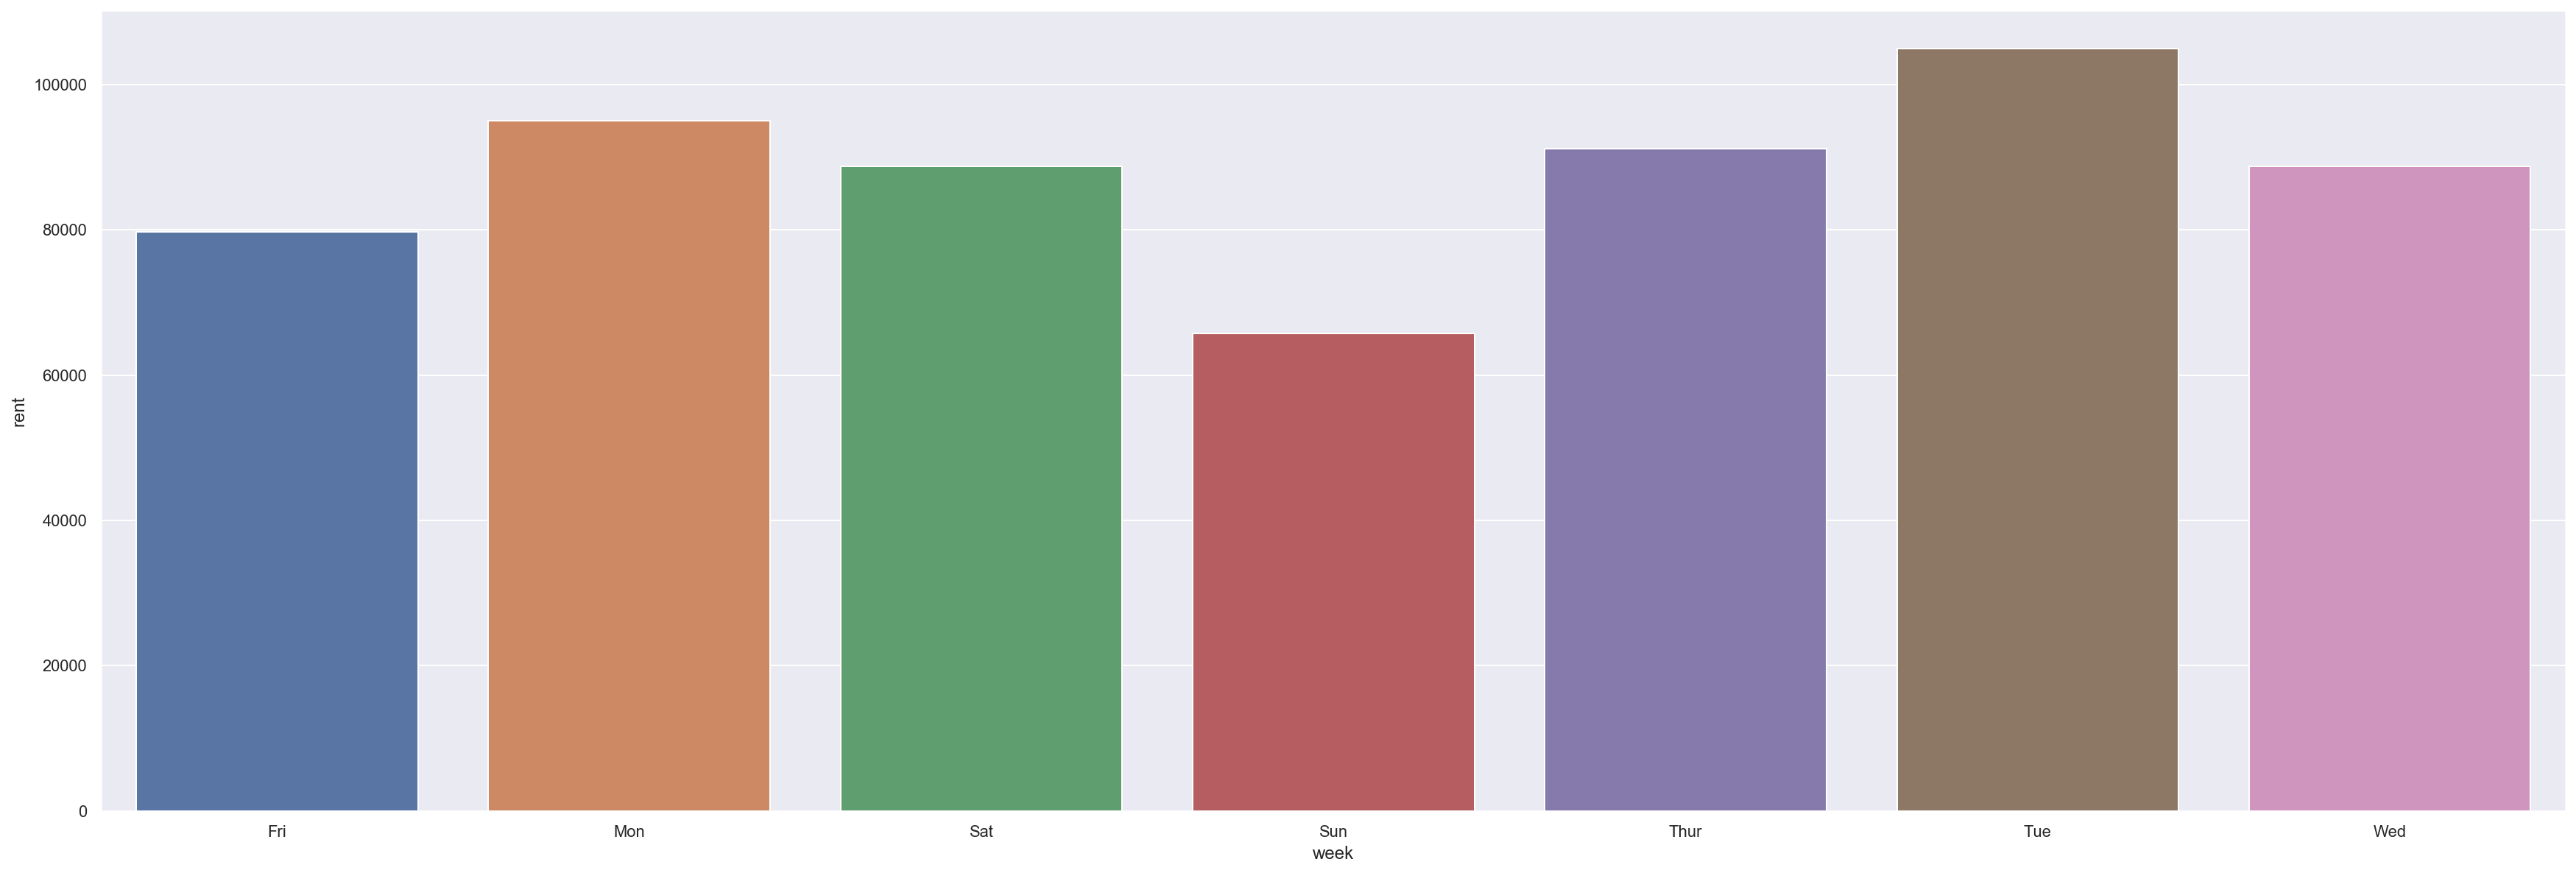

In [348]:
table_week =  table2
sns.barplot(data = table_week, x=table_week.index, y=('rent'), order=table_week.index)
sns.set(rc={'figure.figsize':(30,10)})

### 이용시간과 이용거리의 상관계수

In [139]:
import numpy as np

In [189]:
np.corrcoef(df_time_using["이용시간"], df_time_using["이용거리"])[0, 1]

0.7055977123134471

In [190]:
df_bicycle.describe()

,대여 대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리
count,678830.000000,678830.000000,678830.00000,678830.000000,678830.000000,678830.000000
mean,1675.677034,6.877102,1964.89045,6.815027,22.325137,3114.464667
std,804.430390,5.007707,809.38797,4.937737,25.073221,4396.864527
min,101.000000,1.000000,1203.00000,1.000000,1.000000,0.000000
25%,1264.000000,3.000000,1448.00000,3.000000,7.000000,1030.000000
50%,1669.000000,6.000000,1911.00000,6.000000,13.000000,1860.000000
75%,2174.000000,9.000000,2264.00000,9.000000,28.000000,3550.000000
max,99999.000000,40.000000,99999.00000,39.000000,1719.000000,185110.000000


### 가장 많은 대여가 일어나는 지역

### 주변 환경에 따른 배치 장소 정하기

In [4]:
def find_position(position):
    if "역"  in position:
        return "역"
    elif "버스" in position:
        return "정류장"
    elif "정류장" in position:
        return "정류장"
    elif "학교" in position:
        return "교육시설"
    elif "학원" in position:
        return "교육시설"
    elif "아파트" in position:
        return "주택가"
    elif "단지" in position:
        return "주택가"
    elif "타운" in position:
        return "주택가"
    elif "성당" in position:
        return "종교시설"
    elif "교회" in position:
        return "종교시설"
    elif "경찰서" in position:
        return "공공시설"
    elif "기동대" in position:
        return "공공시설"
    elif "병원" in position:
        return "병원"
    elif "은행" in position:
        return "은행"
    elif "교차로" in position:
        return "대로"
    elif "삼거리" in position:
        return "대로"
    elif "나들목" in position:
        return "대로"
    elif "시장" in position:
        return "시장"
    elif "마트" in position:
        return "시장"
    elif "공원" in position:
        return "공원"
    elif "단말기정비" in position:
        return "단말기정비" 
    else: 
        return 'others'

#### 대여 대여소명에 따른 분류

In [262]:
df_bicycle["start_position"] = df_bicycle["대여 대여소명"].apply(find_position)

In [9]:
datas3 = pd.Series.unique(df_bicycle["대여 대여소명"])

In [17]:
df3 = pd.DataFrame(datas3)
df3[0]

df3 = {
    "start_position": datas3,
    
}
df4 = pd.DataFrame(df3)
df4

,start_position
0,수서역 5번출구 뒤
1,잠실나들목
2,문정현대아파트 교차로
3,송파구청 교차로
4,송파중학교 정문
...,...
1519,연신내역 1번 출구
1520,상림마을 롯데캐슬2단지 옆
1521,신도고등학교
1522,국군복지단


In [19]:
df4["start_postion(clean)"] = df4["start_position"].apply(find_position)
df4

,start_position,start_postion(clean)
0,수서역 5번출구 뒤,역
1,잠실나들목,대로
2,문정현대아파트 교차로,주택가
3,송파구청 교차로,대로
4,송파중학교 정문,교육시설
...,...,...
1519,연신내역 1번 출구,역
1520,상림마을 롯데캐슬2단지 옆,주택가
1521,신도고등학교,교육시설
1522,국군복지단,others


In [32]:
p1= len(df4[df4["start_postion(clean)"]=="역"])
p2= len(df4[df4["start_postion(clean)"]=="정류장"])
p3= len(df4[df4["start_postion(clean)"]=="대로"])
p4= len(df4[df4["start_postion(clean)"]=="주택가"])
p5= len(df4[df4["start_postion(clean)"]=="교육시설"])
p6= len(df4[df4["start_postion(clean)"]=="단말기정비"])
p7= len(df4[df4["start_postion(clean)"]=="시장"])
p8= len(df4[df4["start_postion(clean)"]=="공원"])
p9= len(df4[df4["start_postion(clean)"]=="종교시설"])
p10= len((df4[df4["start_postion(clean)"]=="공공시설"]))
p11= len(df4[df4["start_postion(clean)"]=="병원"])
p12= len(df4[df4["start_postion(clean)"]=="은행"])
p13= len(df4[df4["start_postion(clean)"]=="others"])

In [33]:
y = {"place": ["station", "busstop", "street", "living area", "education_area", "garage", "market", 
     "park", "religious", "public", "hospital", "bank", "others"],
     "value": [p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13]}
    

In [34]:
df7 = pd.DataFrame(y)
df7

,place,value
0,station,391
1,busstop,30
2,street,63
3,living area,167
4,education_area,93
5,garage,1
6,market,15
7,park,81
8,religious,16
9,public,5


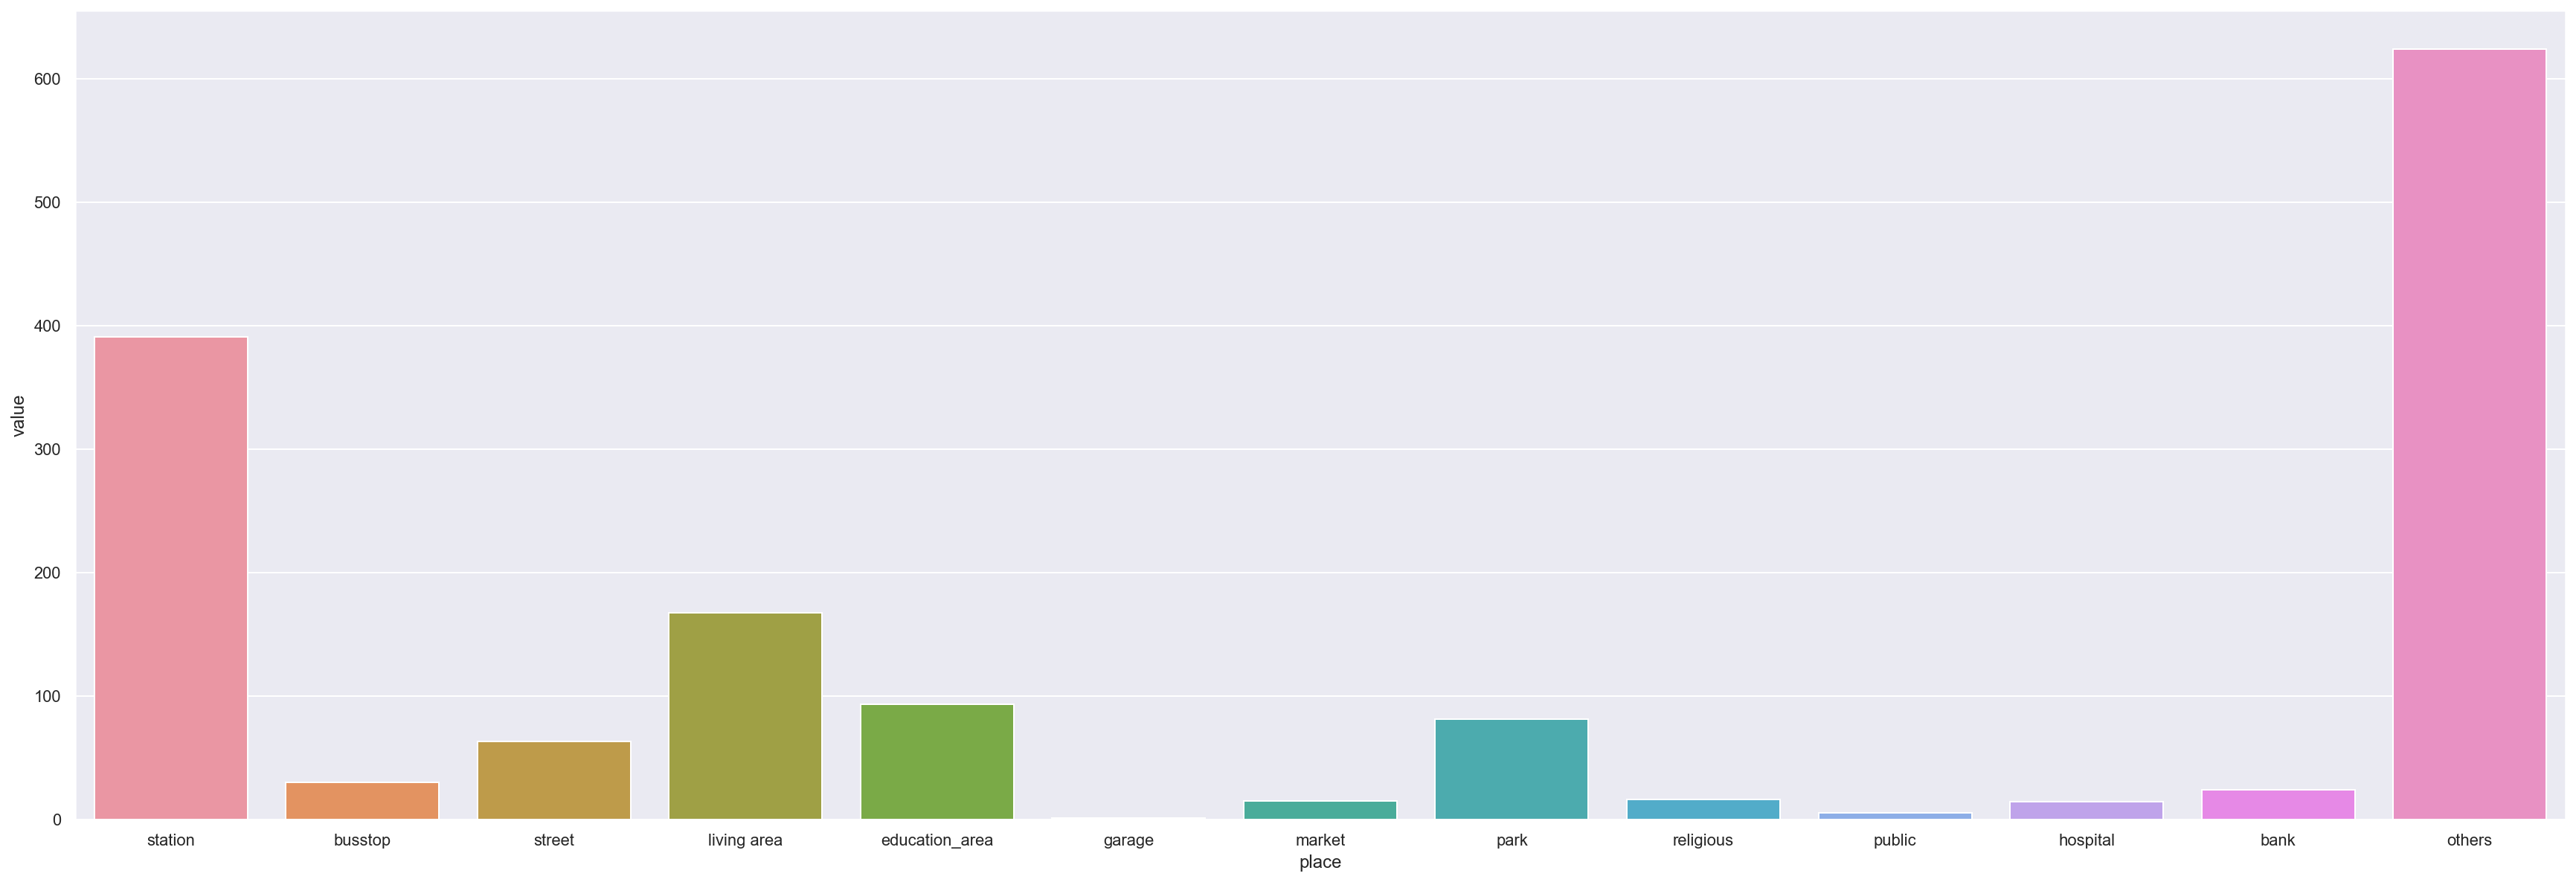

In [38]:
sns.barplot(data = df7, x="place", y="value", label="place")
sns.set(rc={'figure.figsize':(30,10)})


#### 반납 대여소명에 따른 분류

In [6]:
df_bicycle["end_position"] = df_bicycle["반납대여소명"].apply(find_position)
df_bicycle


,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,end_position
0,SPB-04392,2019-11-28 23:07:06,2377,수서역 5번출구 뒤,9,2019-11-28 23:18:44,1203,밀리아나2빌딩 앞,5,11,1980.0,others
1,SPB-23502,2019-11-28 22:43:23,2613,잠실나들목,3,2019-11-29 00:07:07,1203,밀리아나2빌딩 앞,1,82,11130.0,others
2,SPB-11498,2019-11-29 00:04:35,1256,문정현대아파트 교차로,6,2019-11-29 00:11:24,1203,밀리아나2빌딩 앞,14,6,800.0,others
3,SPB-16665,2019-11-29 00:02:57,1278,송파구청 교차로,9,2019-11-29 00:21:18,1203,밀리아나2빌딩 앞,2,18,3730.0,others
4,SPB-14688,2019-11-29 00:17:16,1230,송파중학교 정문,5,2019-11-29 00:26:36,1203,밀리아나2빌딩 앞,3,9,1370.0,others
...,...,...,...,...,...,...,...,...,...,...,...,...
678825,SPB-07983,2019-11-26 08:27:07,2183,동방1교,2,2019-11-26 09:31:27,99999,영남단말기정비,5,59,8520.0,단말기정비
678826,SPB-24906,2019-11-27 08:26:19,2141,미림여고입구 교차로,2,2019-11-27 09:26:19,99999,영남단말기정비,5,59,8680.0,단말기정비
678827,SPB-17861,2019-11-28 08:11:43,2183,동방1교,4,2019-11-28 08:54:39,99999,영남단말기정비,5,40,10570.0,단말기정비
678828,SPB-17173,2019-11-29 08:12:31,2183,동방1교,1,2019-11-29 09:17:29,99999,영남단말기정비,5,64,10560.0,단말기정비


In [10]:
datas4 = pd.Series.unique(df_bicycle["반납대여소명"])
datas4

array(['밀리아나2빌딩 앞', '거여역 3번출구', '종합운동장역 4번출구', '9호선종합운동장역 9번출구',
       '마천CU우방점 앞', '풍납현대아파트쉼터', '잠실나루역 (2번 출구 쪽)', '롯데월드타워(잠실역2번출구 쪽)',
       '방이삼거리', '송파역 2번 출구앞', '백토공원 앞', '오금역 7번 출구 인근', '올림픽공원역 1번출구 앞',
       '송파파인타운 7단지', '방이역 4번출구', '잠실본동주민센터뒤 잠실근린공원', '삼전사거리 포스코더샵',
       '잠실새내역 5번 출구 뒤', '아시아지하보도 2번 출구', '잠실4동 주민센터 옆', '거여역 8번출구 뒤',
       '마천사거리', '송파체육문화회관 앞', '송파중학교 정문', '잠실역 6번출구', '롯데마트 주차장 옆',
       '잠실3거리(갤러리아팰리스)', '잠실트리지움310동 옆', '문정 법조단지3', '문정 법조단지4',
       '문정 법조단지5', '문정 법조단지6', '문정 법조단지7', '문정 법조단지8', '문정 법조단지9',
       '문정 법조단지10', '문정 법조단지11', '방이초등학교', '아주중학교건너편', '문정2동 주민센터',
       '석촌역 2번출구', '문정현대아파트 교차로', '가락시장역 롯데마트앞', '가락미륭아파트 앞', '방이역 1번출구',
       '방이동 한양3차아파트 옆', '송파여성문화회관 앞', '장지공영차고지', '천호역 10번 출구 앞',
       '문정동 근린공원', '문정동 글샘 공원', '올림픽공원 남2문 앞', '몽촌토성역 1번출구 옆', '리센츠아파트',
       '송파도서관', '영파여고 앞', '거여초등학교 옆', '오금동 송파 참병원', '송파구청 교차로',
       '마천금호어울림 1차아파트 건너편', '송파파크데일 2단지입구 앞 주차장', '송파소방서 맞은편(성내4교)',
       '오금공원 사거리', '위례별 유치원 뒤', '위례중앙푸

In [26]:
df5 = pd.DataFrame(datas4)

df5 = {
    "end_position": datas4,
    
}
df6 = pd.DataFrame(df5)
df6

,end_position
0,밀리아나2빌딩 앞
1,거여역 3번출구
2,종합운동장역 4번출구
3,9호선종합운동장역 9번출구
4,마천CU우방점 앞
...,...
786,래미안 구의파크 스위트
787,개화정비
788,강남센터
789,영남주차장 정비센터


In [27]:
df6["end_postion(clean)"] = df6["end_position"].apply(find_position)
df6

,end_position,end_postion(clean)
0,밀리아나2빌딩 앞,others
1,거여역 3번출구,역
2,종합운동장역 4번출구,역
3,9호선종합운동장역 9번출구,역
4,마천CU우방점 앞,others
...,...,...
786,래미안 구의파크 스위트,others
787,개화정비,others
788,강남센터,others
789,영남주차장 정비센터,others


In [28]:
ep1= len(df6[df6["end_postion(clean)"]=="역"])
ep2= len(df6[df6["end_postion(clean)"]=="정류장"])
ep3= len(df6[df6["end_postion(clean)"]=="대로"])
ep4= len(df6[df6["end_postion(clean)"]=="주택가"])
ep5= len(df6[df6["end_postion(clean)"]=="교육시설"])
ep6= len(df6[df6["end_postion(clean)"]=="단말기정비"])
ep7= len(df6[df6["end_postion(clean)"]=="시장"])
ep8= len(df6[df6["end_postion(clean)"]=="공원"])
ep9= len(df6[df6["end_postion(clean)"]=="종교시설"])
ep10= len(df6[df6["end_postion(clean)"]=="공공시설"])
ep11= len(df6[df6["end_postion(clean)"]=="병원"])
ep12= len(df6[df6["end_postion(clean)"]=="은행"])
ep13= len(df6[df6["end_postion(clean)"]=="others"])

In [40]:
y2 = {"end_place": ["station", "busstop", "street", "living area", "education_area", "garage", "market", 
     "park", "religious", "public", "hospital", "bank", "others"],
     "value": [ep1, ep2, ep3, ep4, ep5, ep6, ep7, ep8, ep9, ep10, ep11, ep12, ep13]}
    

In [41]:
df8 = pd.DataFrame(y2)
df8

,end_place,value
0,station,198
1,busstop,12
2,street,35
3,living area,99
4,education_area,51
5,garage,1
6,market,5
7,park,39
8,religious,11
9,public,2


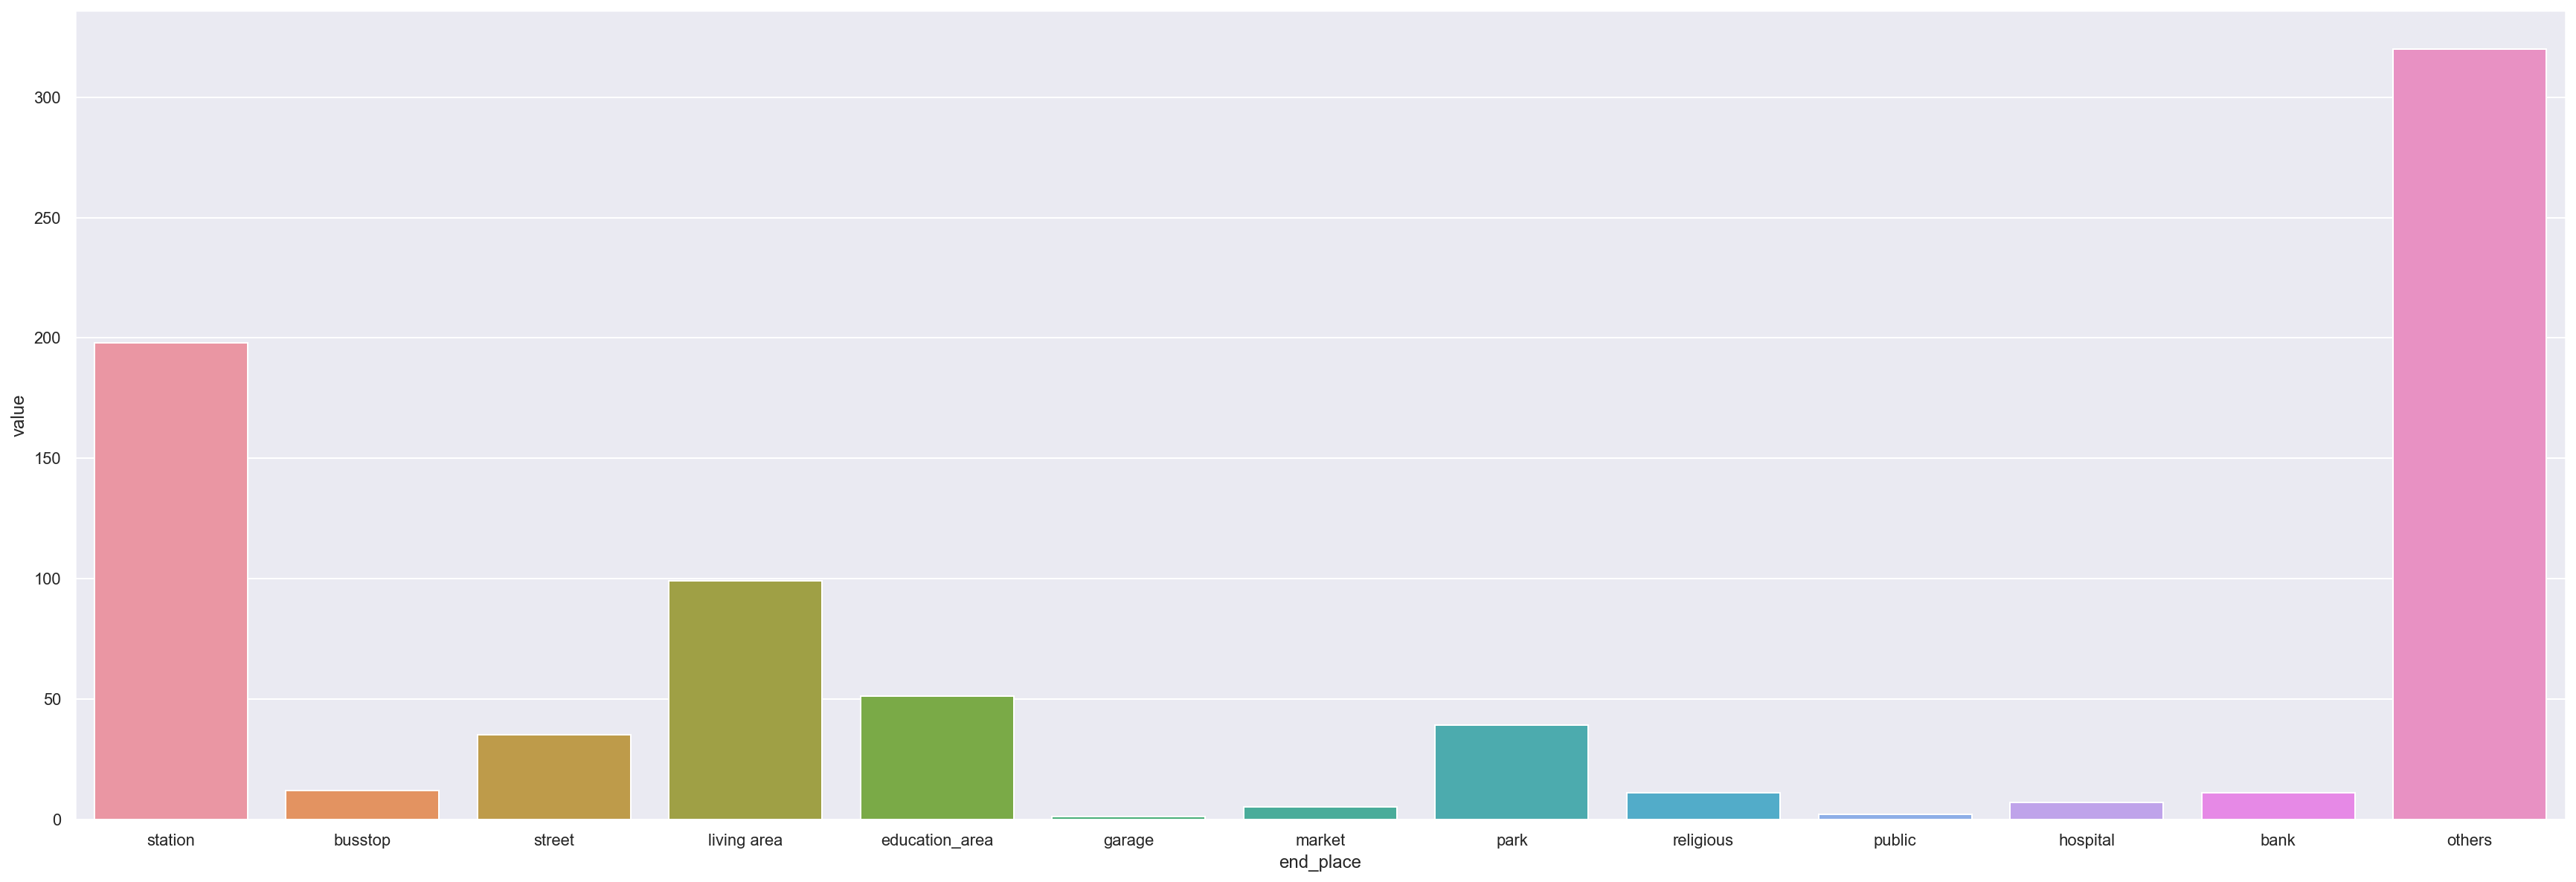

In [42]:
sns.barplot(data = df8, x="end_place", y="value", label="place")
sns.set(rc={'figure.figsize':(30,10)})

### 결론
- 출퇴근 시간에 가장 많이 따릉이를 대여한다.
- 역 주변에서 가장 많이 대여되고, 반납되므로 해당 시간에 역 쪽에 따릉이를 많이 배치한다.
- 특히, 출퇴근 시간 모두 가장 많은 대여가 일어나는 구로구와 잠실 쪽에 더 많이 따릉이를 배치하도록 한다. 